## Ensemble Learning / Combinación de Aprendizaje 

Desventajas de los árboles de decisión:

* No son robustos: pequeños cambios en el conjunto de entrenamiento cambian significativamente el árbol lo que puede producir una predicción final diferente.

* Susceptible a overfitting.

<img src="Imagenes/rf1.png" alt="drawing" width="500"/>>

* Preferencia por fronteras de decisión ortogonales: susceptibles a rotaciones en los datos.

<img src="Imagenes/rf2.jpg" alt="drawing" width="500"/>>

¿Por qué a pesar de todas estas desventajas los árboles de decisión están de "moda"?

* Ensemble Learning: proceso por el cual múltiples modelos son estratégicamente generados y combinados para resolver un problema.

Ejemplo: resolver el problema de clasificación del Titanic (vive o muere) por medio de Regresión Logística, Bosque Aleatorio y SVM. La predicción final sería el promedio de las predicciones de los tres modelos.

La idea detrás de esto es que, como los algoritmos aprenden de maneras diferentes, el promedio de sus predicciones condensará el aprendizaje de cada uno de ellos y, en teoría, la predicción promedio será mejor que la predicción de los modelos por separado (*wisdom of the crowd*).

Random Forrest es un ensamble de árboles de decisión.

### Random Forrest

A grandes rasgos Random Forrest opera de la siguiente manera:

* Entrena un N número de árboles de decisión con muestreos aleatorios del training set.
* Promedia la predicción de todos los árboles y el resultado es la predicción final del algoritmo. 

Cuando el muestreo se lleva acabo CON REMPLAZO recibe el nombre de bagging.

<img src="Imagenes/rf4.jpg" alt="drawing" width="700"/>

Si el muestreo se lleva acabo SIN REMPLAZO recibe el nombre de pasting.

Por último cabe señalar que no se entrena a cada árbol con TODAS las variables del dataset, sino con un conjunto aleatorio de ellas. Esto buscando tener el mayor número de clasificadores diferentes posibles.

Ventajas del algoritmo:

* Puede usarse tanto para clasificación y regresión.

* Puede visualizar la importancia relativa de variables.

* Los hiperparámetros usados por defecto por lo general llevan a buenas predicciones.

* Difícil que caigan en overfitting.


No obstante, un gran número de árboles hacen al algoritmo lento e ineficiente para problemas de la vida real.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Datos del Titanic ya limpios

train = pd.read_pickle('Datos/trainTitanic.pkl')
test = pd.read_pickle('Datos/testTitanic.pkl')
y_train = pd.read_pickle('Datos/y_trainTitanic.pkl')
y_test = pd.read_pickle('Datos/y_testTitanic.pkl')

In [3]:
train.head()

,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,stages_of_life_Adult,stages_of_life_Children,Alone_0,Alone_1
0,22.0,1,0,7.2500,2,0,0,1,0,1,0,0,1,1,0,0,1
1,38.0,1,0,71.2833,2,1,0,0,1,0,1,0,0,1,0,0,1
2,26.0,0,0,7.9250,1,0,0,1,1,0,0,0,1,1,0,1,0
3,35.0,1,0,53.1000,2,1,0,0,1,0,0,0,1,1,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,1,0,0,1,1,0,1,0


In [4]:
from sklearn.metrics import roc_auc_score, log_loss

In [5]:
#Se define profundidad
ND = 1
max_depth = 2

# tamaño grid ntrees
NT = 9
min_trees = 100
max_trees = 900
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')


#matriz para guardar resultado de ecm
error = np.zeros((NT))
for j,ntrees in enumerate(grid_tree):
    clf = RandomForestClassifier(n_estimators= ntrees, 
                                 max_depth = max_depth, random_state = 8)

# hacer unestimación sobre train
    clf.fit(train, y_train)
# hagamos un predict: tst
    score = roc_auc_score(y_test, clf.predict(test))
# y guardemos
    error[j] = score
    print("iteracion:",
          j+1,
          "numero de arboles:",
          ntrees,
          "error:", round(score,3))

iteracion: 1 numero de arboles: 100 error: 0.908
iteracion: 2 numero de arboles: 200 error: 0.984
iteracion: 3 numero de arboles: 300 error: 0.984
iteracion: 4 numero de arboles: 400 error: 0.984
iteracion: 5 numero de arboles: 500 error: 0.984
iteracion: 6 numero de arboles: 600 error: 0.987
iteracion: 7 numero de arboles: 700 error: 0.987
iteracion: 8 numero de arboles: 800 error: 0.987
iteracion: 9 numero de arboles: 900 error: 0.987


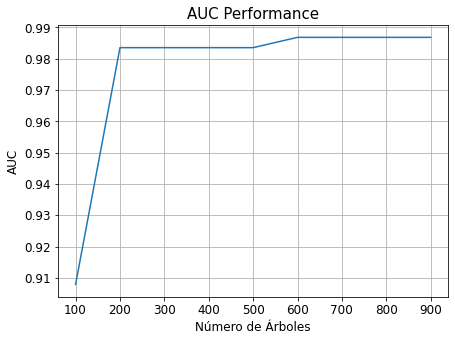

In [6]:
plt.figure(figsize=(7,5))
plt.title('AUC Performance', fontsize = 15)
plt.plot(np.linspace(min_trees, max_trees, NT), error)
plt.xlabel('Número de Árboles', fontsize = 12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True);

In [7]:
#Se define profundidad
ND = 1
max_depth = 2

# tamaño grid ntrees
NT = 9
min_trees = 100
max_trees = 900
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

#matriz para guardar resultado de ecm
error = np.zeros((NT))
for j,ntrees in enumerate(grid_tree):
    clf = RandomForestClassifier(n_estimators= ntrees,
                                 max_depth = max_depth,
                                random_state = 8)

# hacer unestimación sobre train
    clf.fit(train, y_train)
# hagamos un predict: tst
    score = log_loss(y_test, clf.predict(test))
# y guardemos
    error[j] = score
    print("iteracion:",
          j+1,
          "numero de arboles:",
          ntrees,
          "error:",
          round(score,3))


iteracion: 1 numero de arboles: 100 error: 2.314
iteracion: 2 numero de arboles: 200 error: 0.413
iteracion: 3 numero de arboles: 300 error: 0.413
iteracion: 4 numero de arboles: 400 error: 0.413
iteracion: 5 numero de arboles: 500 error: 0.413
iteracion: 6 numero de arboles: 600 error: 0.331
iteracion: 7 numero de arboles: 700 error: 0.331
iteracion: 8 numero de arboles: 800 error: 0.331
iteracion: 9 numero de arboles: 900 error: 0.331


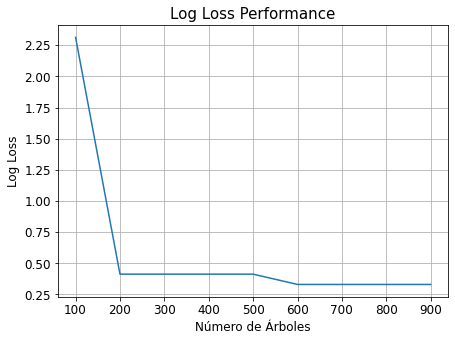

In [8]:
plt.figure(figsize=(7,5))
plt.title('Log Loss Performance', fontsize = 15)
plt.plot(np.linspace(min_trees, max_trees, NT), error)
plt.xlabel('Número de Árboles', fontsize = 12)
plt.ylabel('Log Loss', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True);

In [9]:
#Tamaño grid depth
ND = 4
min_depth = 1
max_depth = 4
grid_depth = np.linspace(min_depth,max_depth,ND).astype('int')
# tamaño grid ntrees
NT = 9
min_trees = 100
max_trees = 900
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

error = np.zeros((ND,NT))

for i, max_depth in enumerate(grid_depth):
    for j,ntrees in enumerate(grid_tree):
        clf = RandomForestClassifier(n_estimators= ntrees,
                                     max_depth = max_depth,
                                    random_state = 8)

# hacer unestimación sobre train
        clf.fit(train, y_train)
    # hagamos un predict: tst
        score = roc_auc_score(y_test, clf.predict(test))
    # y guardemos
        error[i,j] = score
        print("it:",
              j+1,
              "arboles:",
              ntrees,
              "profundidad:",
              max_depth,
              "error:",
              round(score,3))

it: 1 arboles: 100 profundidad: 1 error: 0.967
it: 2 arboles: 200 profundidad: 1 error: 0.921
it: 3 arboles: 300 profundidad: 1 error: 0.921
it: 4 arboles: 400 profundidad: 1 error: 0.862
it: 5 arboles: 500 profundidad: 1 error: 0.862
it: 6 arboles: 600 profundidad: 1 error: 0.862
it: 7 arboles: 700 profundidad: 1 error: 0.868
it: 8 arboles: 800 profundidad: 1 error: 0.872
it: 9 arboles: 900 profundidad: 1 error: 0.878
it: 1 arboles: 100 profundidad: 2 error: 0.908
it: 2 arboles: 200 profundidad: 2 error: 0.984
it: 3 arboles: 300 profundidad: 2 error: 0.984
it: 4 arboles: 400 profundidad: 2 error: 0.984
it: 5 arboles: 500 profundidad: 2 error: 0.984
it: 6 arboles: 600 profundidad: 2 error: 0.987
it: 7 arboles: 700 profundidad: 2 error: 0.987
it: 8 arboles: 800 profundidad: 2 error: 0.987
it: 9 arboles: 900 profundidad: 2 error: 0.987
it: 1 arboles: 100 profundidad: 3 error: 0.98
it: 2 arboles: 200 profundidad: 3 error: 0.98
it: 3 arboles: 300 profundidad: 3 error: 0.982
it: 4 arboles: 

<AxesSubplot:>

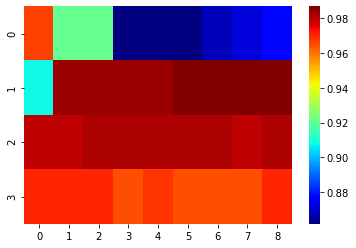

In [10]:
import seaborn as sns
sns.heatmap(error, cmap ='jet')

In [11]:
clf = RandomForestClassifier(n_estimators= 600, 
                                 max_depth = 2, 
                             random_state = 8)
clf.fit(train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=600, random_state=8)

In [12]:
x = train.columns

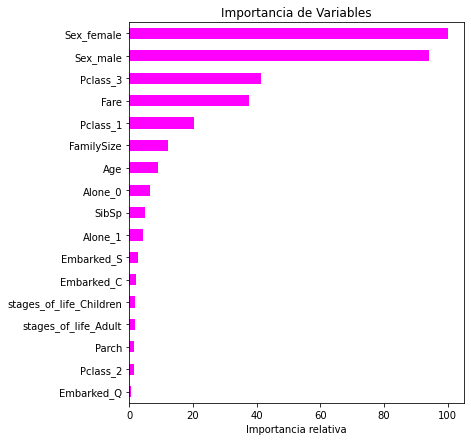

In [13]:
#DF de variables mas importantes
f_imp = pd.DataFrame(clf.feature_importances_,
                     index=x, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)
#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',color='magenta')
plt.xlabel('Importancia relativa');


### Se encuentra que la variable de mayor importancia para sobrevivir en el Titanic era el sexo de la persona, seguido de la clase en el pase.